### <font color="yellow"> 0-Dependencies </font>

In [110]:
import time
import re
import random
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from pandas_datareader import data as pdr

import warnings
# warnings.filterwarnings("ignore")

In [111]:
(
    yf
    .pdr_override()
)

np.set_printoptions(precision = 3)
plt.style.use("ggplot")
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

In [112]:
spy_df = yf.download('SPY', "2005-11-01", "2024-11-01")["Adj Close"].to_frame()

[*********************100%%**********************]  1 of 1 completed


In [113]:
spy_df

,Adj Close
Date,
2005-11-01,83.991142
2005-11-02,84.869476
2005-11-03,85.231934
2005-11-04,85.120415
2005-11-07,85.204079
...,...
2024-10-25,579.039978
2024-10-28,580.830017
2024-10-29,581.770020


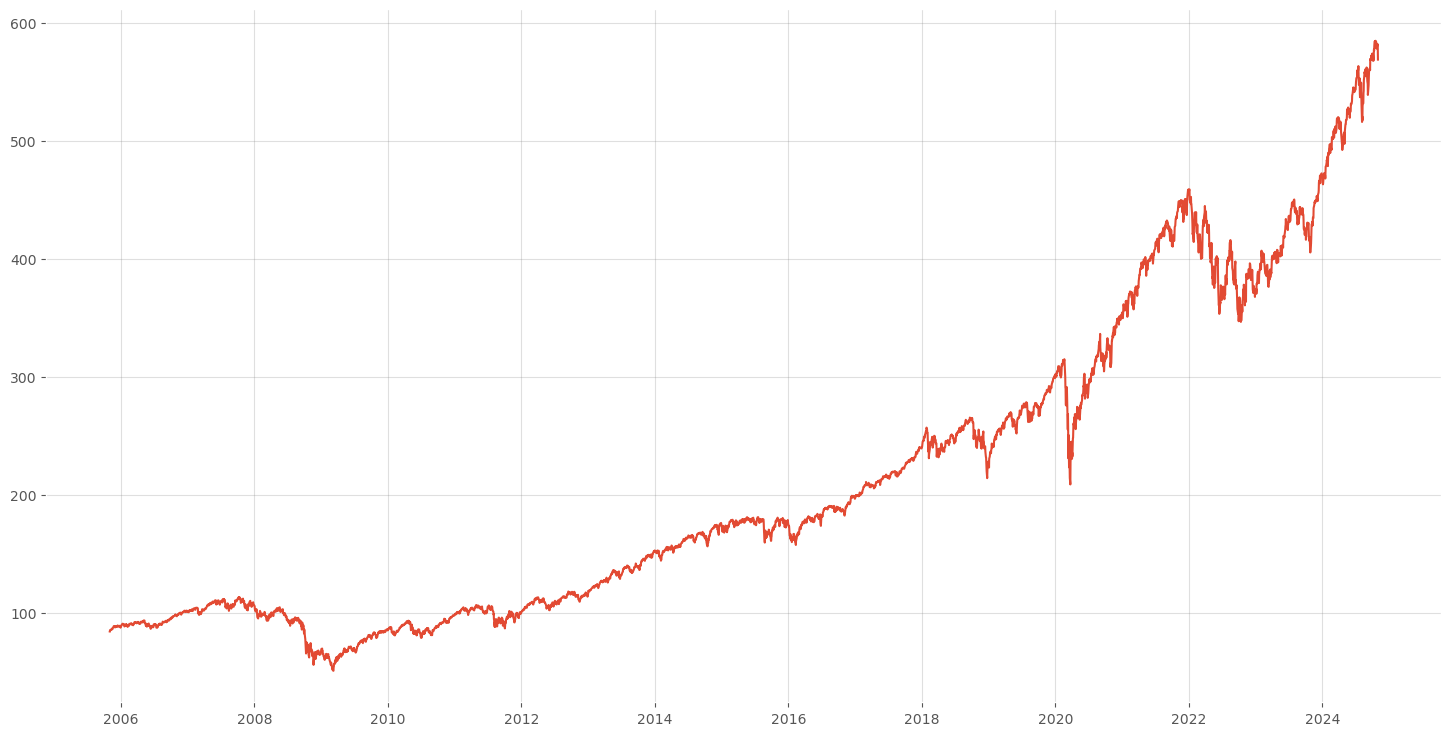

In [114]:
plt.figure(figsize=[18,9])
plt.plot(spy_df)
plt.show()

### <font color="yellow"> Part 1 - Build trading strategies</font>

>First, you should build a series of trading strategies employing momentum, mean-reversion, and machine learning approaches. As you have learned, within each approach, you could come up with varying strategies depending on how you define them. Here, think about how you’d like to do this in a more efficient and effective manner, building on what you have learned about Python programming throughout the course.

##### <font color="yellow"> Part 1.1 - Rolling Statistics</font>

In [115]:
window = 22 # tunable hyper-parameters
short = 20
long = 60

In [116]:
spy_df["Mean"] = spy_df["Adj Close"].rolling(window = window).mean()
spy_df["Min"] = spy_df["Adj Close"].rolling(window = window).min()
spy_df["Max"] = spy_df["Adj Close"].rolling(window = window).max()
spy_df["Median"] = spy_df["Adj Close"].rolling(window = window).median()
spy_df["Ewma"] = spy_df["Adj Close"].ewm(halflife = 10, min_periods = window).mean()

In [117]:
spy_df

,Adj Close,Mean,Min,Max,Median,Ewma
Date,,,,,,
2005-11-01,83.991142,NaN,NaN,NaN,NaN,NaN
2005-11-02,84.869476,NaN,NaN,NaN,NaN,NaN
2005-11-03,85.231934,NaN,NaN,NaN,NaN,NaN
2005-11-04,85.120415,NaN,NaN,NaN,NaN,NaN
2005-11-07,85.204079,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-10-25,579.039978,576.644997,567.799988,584.590027,577.565002,573.741952
2024-10-28,580.830017,577.032726,567.799988,584.590027,578.514984,574.216619
2024-10-29,581.770020,577.500910,567.799988,584.590027,579.139984,574.722447


In [118]:
spy_df = spy_df.dropna()
spy_df

,Adj Close,Mean,Min,Max,Median,Ewma
Date,,,,,,
2005-12-01,88.313072,86.545629,83.991142,88.619759,86.246208,87.068363
2005-12-02,88.424591,86.747150,84.869476,88.619759,86.577320,87.182328
2005-12-05,88.236351,86.900189,85.120415,88.619759,87.054821,87.269412
2005-12-06,88.403641,87.044358,85.120415,88.619759,87.323181,87.361678
2005-12-07,87.887810,87.170149,85.204079,88.619759,87.542763,87.403871
...,...,...,...,...,...,...
2024-10-25,579.039978,576.644997,567.799988,584.590027,577.565002,573.741952
2024-10-28,580.830017,577.032726,567.799988,584.590027,578.514984,574.216619
2024-10-29,581.770020,577.500910,567.799988,584.590027,579.139984,574.722447


<Axes: xlabel='Date'>

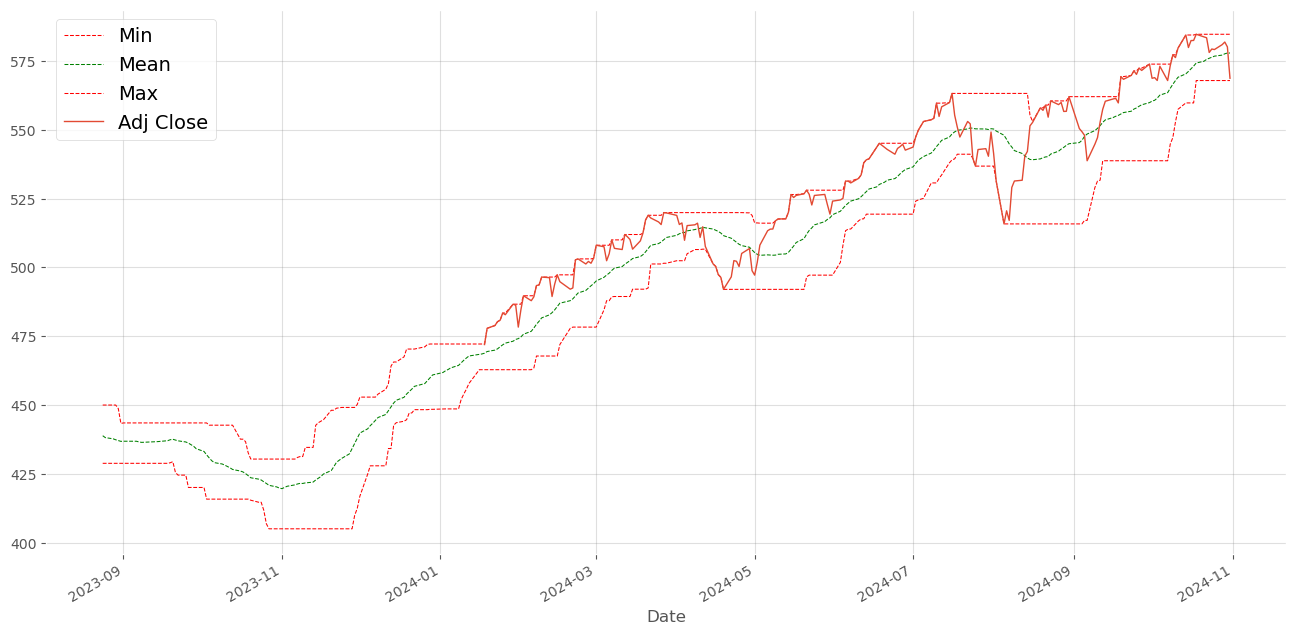

In [128]:
ax =\
(
    spy_df
    [["Min", "Mean", "Max"]]
    .iloc[-300: ] # most recent 200 days
    .plot(figsize = [16, 8],
          style = ["r--", "g--", "r--"],
          linewidth = 0.75)
)

(
    spy_df
    [["Adj Close"]]
    .iloc[-200: ]
    .plot(ax = ax,
          linewidth = 1)
)

In [120]:
spy_df["shorter_MA"] =\
(
    spy_df
    [["Adj Close"]]
    .rolling(window = short) # look-back period
    .mean()
)

spy_df["longer_MA"] =\
(
    spy_df
    [["Adj Close"]]
    .rolling(window = long)
    .mean()
)

<Axes: xlabel='Date'>

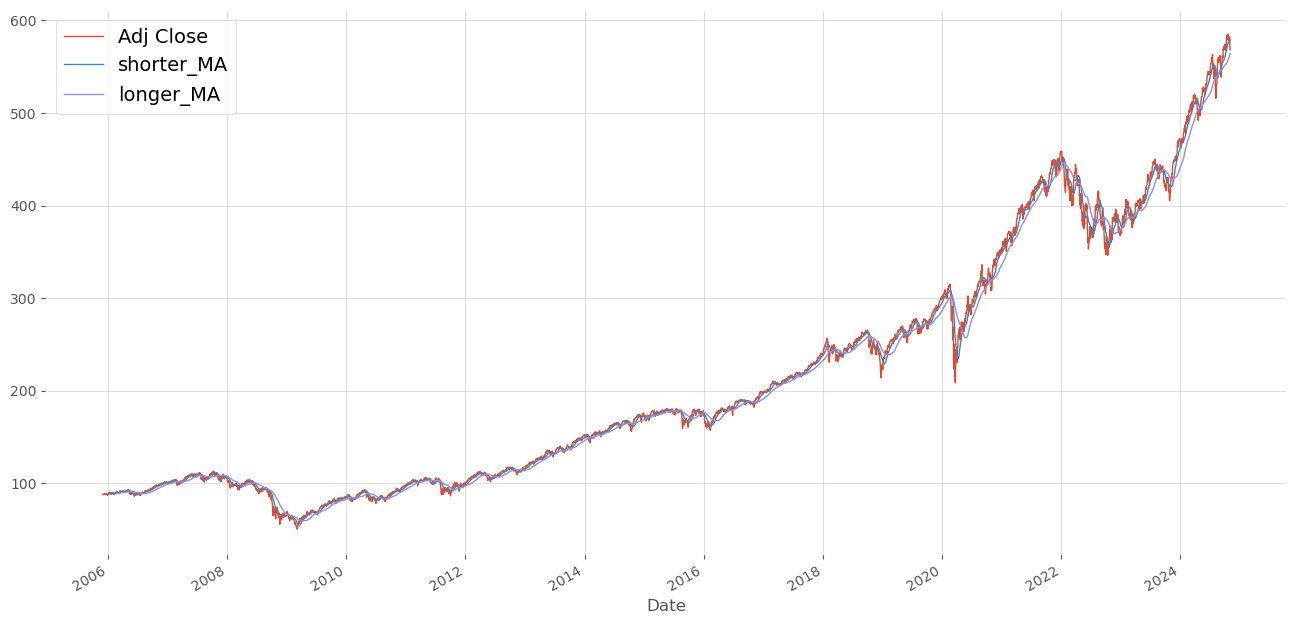

In [121]:
(
    spy_df
    [["Adj Close", "shorter_MA", "longer_MA"]]
    .plot(figsize = [16, 8],
          linewidth = 1)
)

In [122]:
spy_df = spy_df.dropna()
spy_df

,Adj Close,Mean,Min,Max,Median,Ewma,shorter_MA,longer_MA
Date,,,,,,,,
2006-02-28,89.860397,89.573699,87.933235,90.722305,89.849880,89.613465,89.526810,89.104331
2006-03-01,90.659294,89.600139,87.933235,90.722305,89.849880,89.683740,89.592336,89.143434
2006-03-02,90.652252,89.629443,87.933235,90.722305,89.849880,89.748805,89.626323,89.180562
2006-03-03,90.231743,89.669578,87.933235,90.722305,89.916454,89.781242,89.691493,89.213818
2006-03-06,89.818352,89.662571,87.933235,90.722305,89.849880,89.783734,89.758067,89.237397
...,...,...,...,...,...,...,...,...
2024-10-25,579.039978,576.644997,567.799988,584.590027,577.565002,573.741952,577.120999,560.189960
2024-10-28,580.830017,577.032726,567.799988,584.590027,578.514984,574.216619,577.474500,561.015953
2024-10-29,581.770020,577.500910,567.799988,584.590027,579.139984,574.722447,578.132001,562.115488


In [123]:
spy_df["SPY_Trading_Positions"] =\
(
    np
    .where(spy_df["shorter_MA"] > spy_df["longer_MA"], 
           1, -1
          )
)

In [124]:
spy_df.head()

,Adj Close,Mean,Min,Max,Median,Ewma,shorter_MA,longer_MA,SPY_Trading_Positions
Date,,,,,,,,,
2006-02-28,89.860397,89.573699,87.933235,90.722305,89.849880,89.613465,89.526810,89.104331,1
2006-03-01,90.659294,89.600139,87.933235,90.722305,89.849880,89.683740,89.592336,89.143434,1
2006-03-02,90.652252,89.629443,87.933235,90.722305,89.849880,89.748805,89.626323,89.180562,1
2006-03-03,90.231743,89.669578,87.933235,90.722305,89.916454,89.781242,89.691493,89.213818,1
2006-03-06,89.818352,89.662571,87.933235,90.722305,89.849880,89.783734,89.758067,89.237397,1


In [125]:
spy_df["SPY_Trading_Positions"].value_counts()

SPY_Trading_Positions
 1    3359
-1    1343
Name: count, dtype: int64

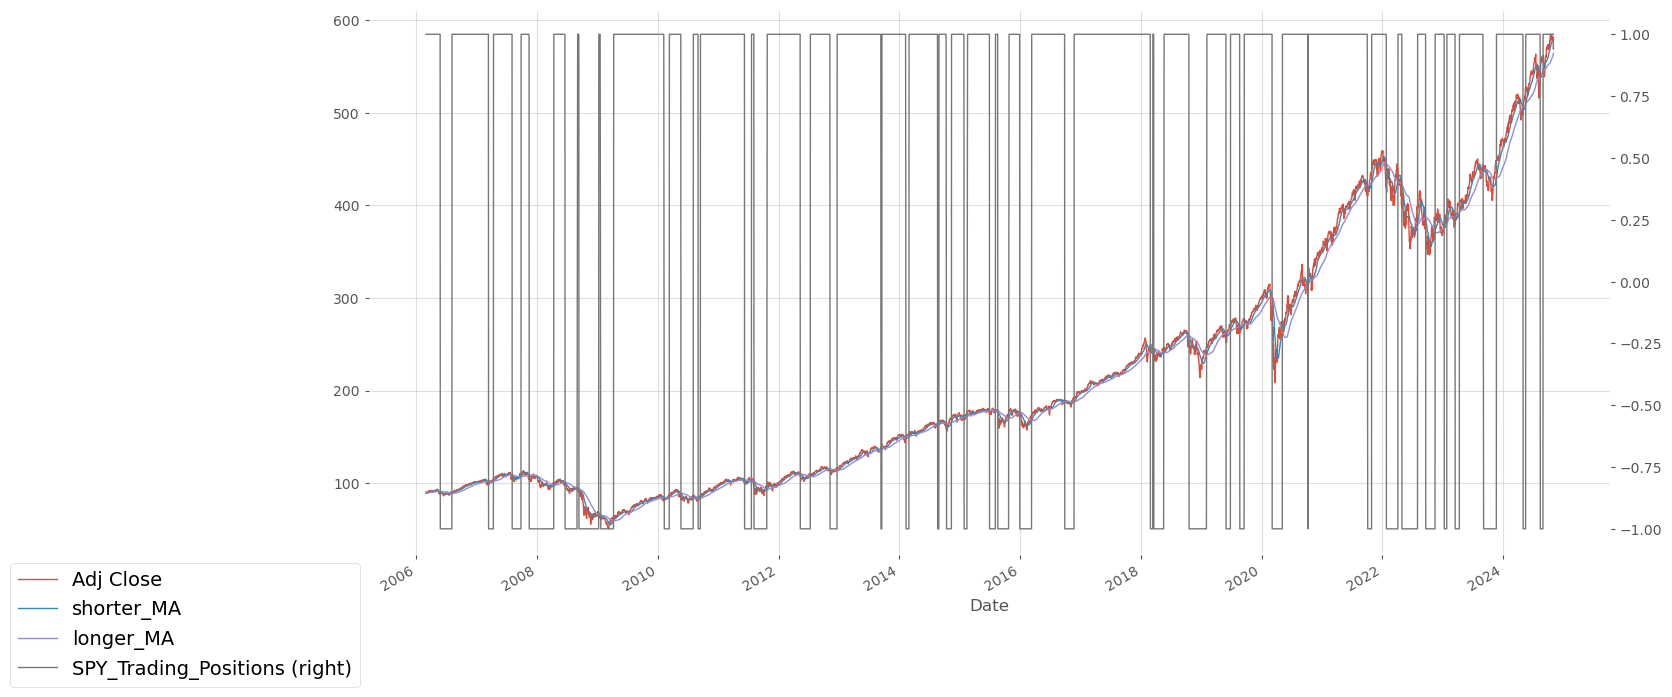

In [126]:
ax =\
(
    spy_df
    [["Adj Close", "shorter_MA", "longer_MA", "SPY_Trading_Positions"]]
    .plot(figsize = [16, 8],
          lw = 1,
          secondary_y = "SPY_Trading_Positions"
         )
)

(ax
 .get_legend()
 .set_bbox_to_anchor((.00, .00)
                    )
)

##### <font color="yellow"> Part 1.2 - Simple Momentum Trading Strategy</font>

In [127]:
spy_df

,Adj Close,Mean,Min,Max,Median,Ewma,shorter_MA,longer_MA,SPY_Trading_Positions
Date,,,,,,,,,
2006-02-28,89.860397,89.573699,87.933235,90.722305,89.849880,89.613465,89.526810,89.104331,1
2006-03-01,90.659294,89.600139,87.933235,90.722305,89.849880,89.683740,89.592336,89.143434,1
2006-03-02,90.652252,89.629443,87.933235,90.722305,89.849880,89.748805,89.626323,89.180562,1
2006-03-03,90.231743,89.669578,87.933235,90.722305,89.916454,89.781242,89.691493,89.213818,1
2006-03-06,89.818352,89.662571,87.933235,90.722305,89.849880,89.783734,89.758067,89.237397,1
...,...,...,...,...,...,...,...,...,...
2024-10-25,579.039978,576.644997,567.799988,584.590027,577.565002,573.741952,577.120999,560.189960,1
2024-10-28,580.830017,577.032726,567.799988,584.590027,578.514984,574.216619,577.474500,561.015953,1
2024-10-29,581.770020,577.500910,567.799988,584.590027,579.139984,574.722447,578.132001,562.115488,1


In [132]:
# create an empty signals dataframe

BUY_or_SELL =\
(
    pd
    .DataFrame(index = spy_df.index)
)

BUY_or_SELL["BUY_or_SELL"] = 0.0
BUY_or_SELL

,BUY_or_SELL
Date,
2006-02-28,0.0
2006-03-01,0.0
2006-03-02,0.0
2006-03-03,0.0
2006-03-06,0.0
...,...
2024-10-25,0.0
2024-10-28,0.0
2024-10-29,0.0


In [135]:
# Assign the set of short and long SMAs (over the respective short and long time windows)
# shorter-term

BUY_or_SELL["shorter_SMA"] =\
(
    spy_df
    ["Adj Close"]
    .rolling(window = short,
             min_periods = 1,
             center = False)
    .mean()
)

# longer-term

BUY_or_SELL["longer_SMA"] =\
(
    spy_df
    ["Adj Close"]
    .rolling(window = long,
             min_periods = 1,
             center = False)
    .mean()
)

BUY_or_SELL

,BUY_or_SELL,shorter_SMA,longer_SMA
Date,,,
2006-02-28,0.0,89.860397,89.860397
2006-03-01,0.0,90.259846,90.259846
2006-03-02,0.0,90.390648,90.390648
2006-03-03,0.0,90.350922,90.350922
2006-03-06,0.0,90.244408,90.244408
...,...,...,...
2024-10-25,0.0,577.120999,560.189960
2024-10-28,0.0,577.474500,561.015953
2024-10-29,0.0,578.132001,562.115488


In [137]:
# Create a signal when the short moving average crosses the long moving average
BUY_or_SELL["BUY_or_SELL"][short: ] =\
(
    np
    .where(BUY_or_SELL["shorter_SMA"][short: ] > BUY_or_SELL["longer_SMA"][short: ],
           1.0, 0.0
          )
)

BUY_or_SELL

,BUY_or_SELL,shorter_SMA,longer_SMA
Date,,,
2006-02-28,0.0,89.860397,89.860397
2006-03-01,0.0,90.259846,90.259846
2006-03-02,0.0,90.390648,90.390648
2006-03-03,0.0,90.350922,90.350922
2006-03-06,0.0,90.244408,90.244408
...,...,...,...
2024-10-25,1.0,577.120999,560.189960
2024-10-28,1.0,577.474500,561.015953
2024-10-29,1.0,578.132001,562.115488


In [144]:
# Calculate the difference between the signals to make trading orders
BUY_or_SELL["Positions"] =\
(
    BUY_or_SELL["BUY_or_SELL"]
    .diff()
)

print(BUY_or_SELL["Positions"].value_counts())

BUY_or_SELL

Positions
 0.0    4622
 1.0      40
-1.0      39
Name: count, dtype: int64


,BUY_or_SELL,shorter_SMA,longer_SMA,Positions
Date,,,,
2006-02-28,0.0,89.860397,89.860397,NaN
2006-03-01,0.0,90.259846,90.259846,0.0
2006-03-02,0.0,90.390648,90.390648,0.0
2006-03-03,0.0,90.350922,90.350922,0.0
2006-03-06,0.0,90.244408,90.244408,0.0
...,...,...,...,...
2024-10-25,1.0,577.120999,560.189960,0.0
2024-10-28,1.0,577.474500,561.015953,0.0
2024-10-29,1.0,578.132001,562.115488,0.0


> Print the signals DataFrame and inspect the results

> visualize the short and long moving averages, along with the buy and sell signals.

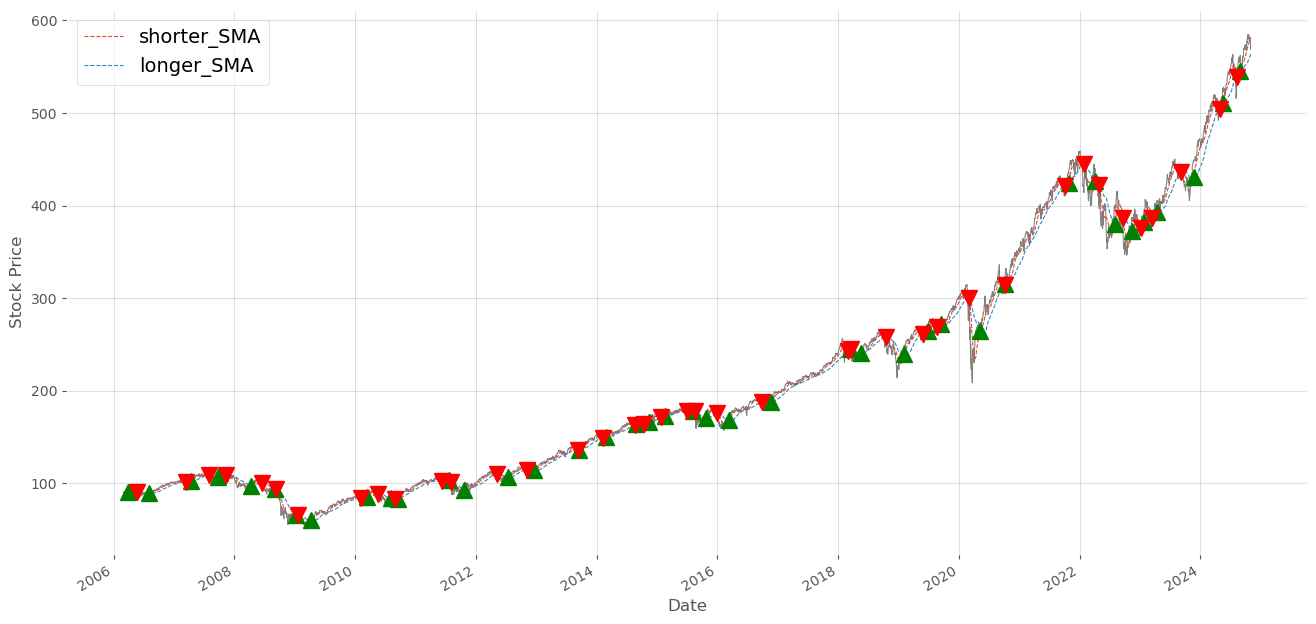

In [141]:
fig =\
(
    plt
    .figure(figsize = [16, 8]
           )
)

sub =\
(
    fig
    .add_subplot(111,
                 ylabel = "Stock Price")
)

(
    spy_df
    ["Adj Close"]
    .plot(ax = sub,
          color = "grey",
          linewidth = 0.75)
)

(
    BUY_or_SELL
    [["shorter_SMA", "longer_SMA"]]
    .plot(ax = sub,
          style = ["--", "--"],
          linewidth = 0.80)
)

# BUY signal

(
    sub
    .plot(BUY_or_SELL.loc[BUY_or_SELL.Positions == 1.0].index,
          BUY_or_SELL.shorter_SMA[BUY_or_SELL.Positions == 1.0],
          "^",
          color = "green",
          markersize = 12)
)

# SELL signal

(
    sub
    .plot(BUY_or_SELL.loc[BUY_or_SELL.Positions == -1.0].index,
          BUY_or_SELL.shorter_SMA[BUY_or_SELL.Positions == -1.0],
          "v",
          color = "red",
          markersize = 12)
)

### <font color="yellow"> Part 2 - Backtesting</font>

>Second, you should backtest the above trading strategies and come up with accompanying data visualization and evidentiary numerical values (i.e., Sharpe Ratio, compound annual growth rate, maximum drawdown, and how much is left on your account) that allow you to compare if and which of your strategies beat the baseline performance of S&P 500, and by how much.

### <font color="yellow"> Part 3 - Executive summary of trading strategies and backtesting results</font>

>Third, you should write up an executive summary of your strategies and backtesting results. Please report at least your top three strategies (i.e., strategy A, strategy B, strategy C). In this summary, you should discuss Sharpe Ratio, compound annual growth rate, and maximum drawdown, comparing your results for strategies A, B, and C. For each of the three sections, please provide a bookmark in your Jupyter Notebook file (for easy access).

### <font color="yellow"> Part 4 - Self-Critique of  Team's Trading Strategies</font>

>In this phase of self-critique, your objective is to dissect and scrutinize our strategies through the lens of common biases and potential market shifts. This process is not just a mere exercise in due diligence; it is a fundamental step in ensuring that our strategies are not only theoretically sound but also practically viable in the dynamic and often unpredictable real-world financial markets.

* Survivorship bias
* Lookahead bias
* Market regime shifts